<a href="https://colab.research.google.com/github/ruchitha11n/data-science-ExcelR/blob/main/PCA_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

NAME: **NADIPELLI RUCHITHA**

COURSE: **DATA SCIENCE (3PM TO 5PM)**

INCHARGE: **PANAM SRAVANI**

**9. PCA**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
import warnings
warnings.filterwarnings("ignore")

In [ ]:
wines = pd.read_csv('/content/wine.csv')
wines.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [ ]:
wines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Type             178 non-null    int64  
 1   Alcohol          178 non-null    float64
 2   Malic            178 non-null    float64
 3   Ash              178 non-null    float64
 4   Alcalinity       178 non-null    float64
 5   Magnesium        178 non-null    int64  
 6   Phenols          178 non-null    float64
 7   Flavanoids       178 non-null    float64
 8   Nonflavanoids    178 non-null    float64
 9   Proanthocyanins  178 non-null    float64
 10  Color            178 non-null    float64
 11  Hue              178 non-null    float64
 12  Dilution         178 non-null    float64
 13  Proline          178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [ ]:
wines_1=wines.iloc[:,1:]

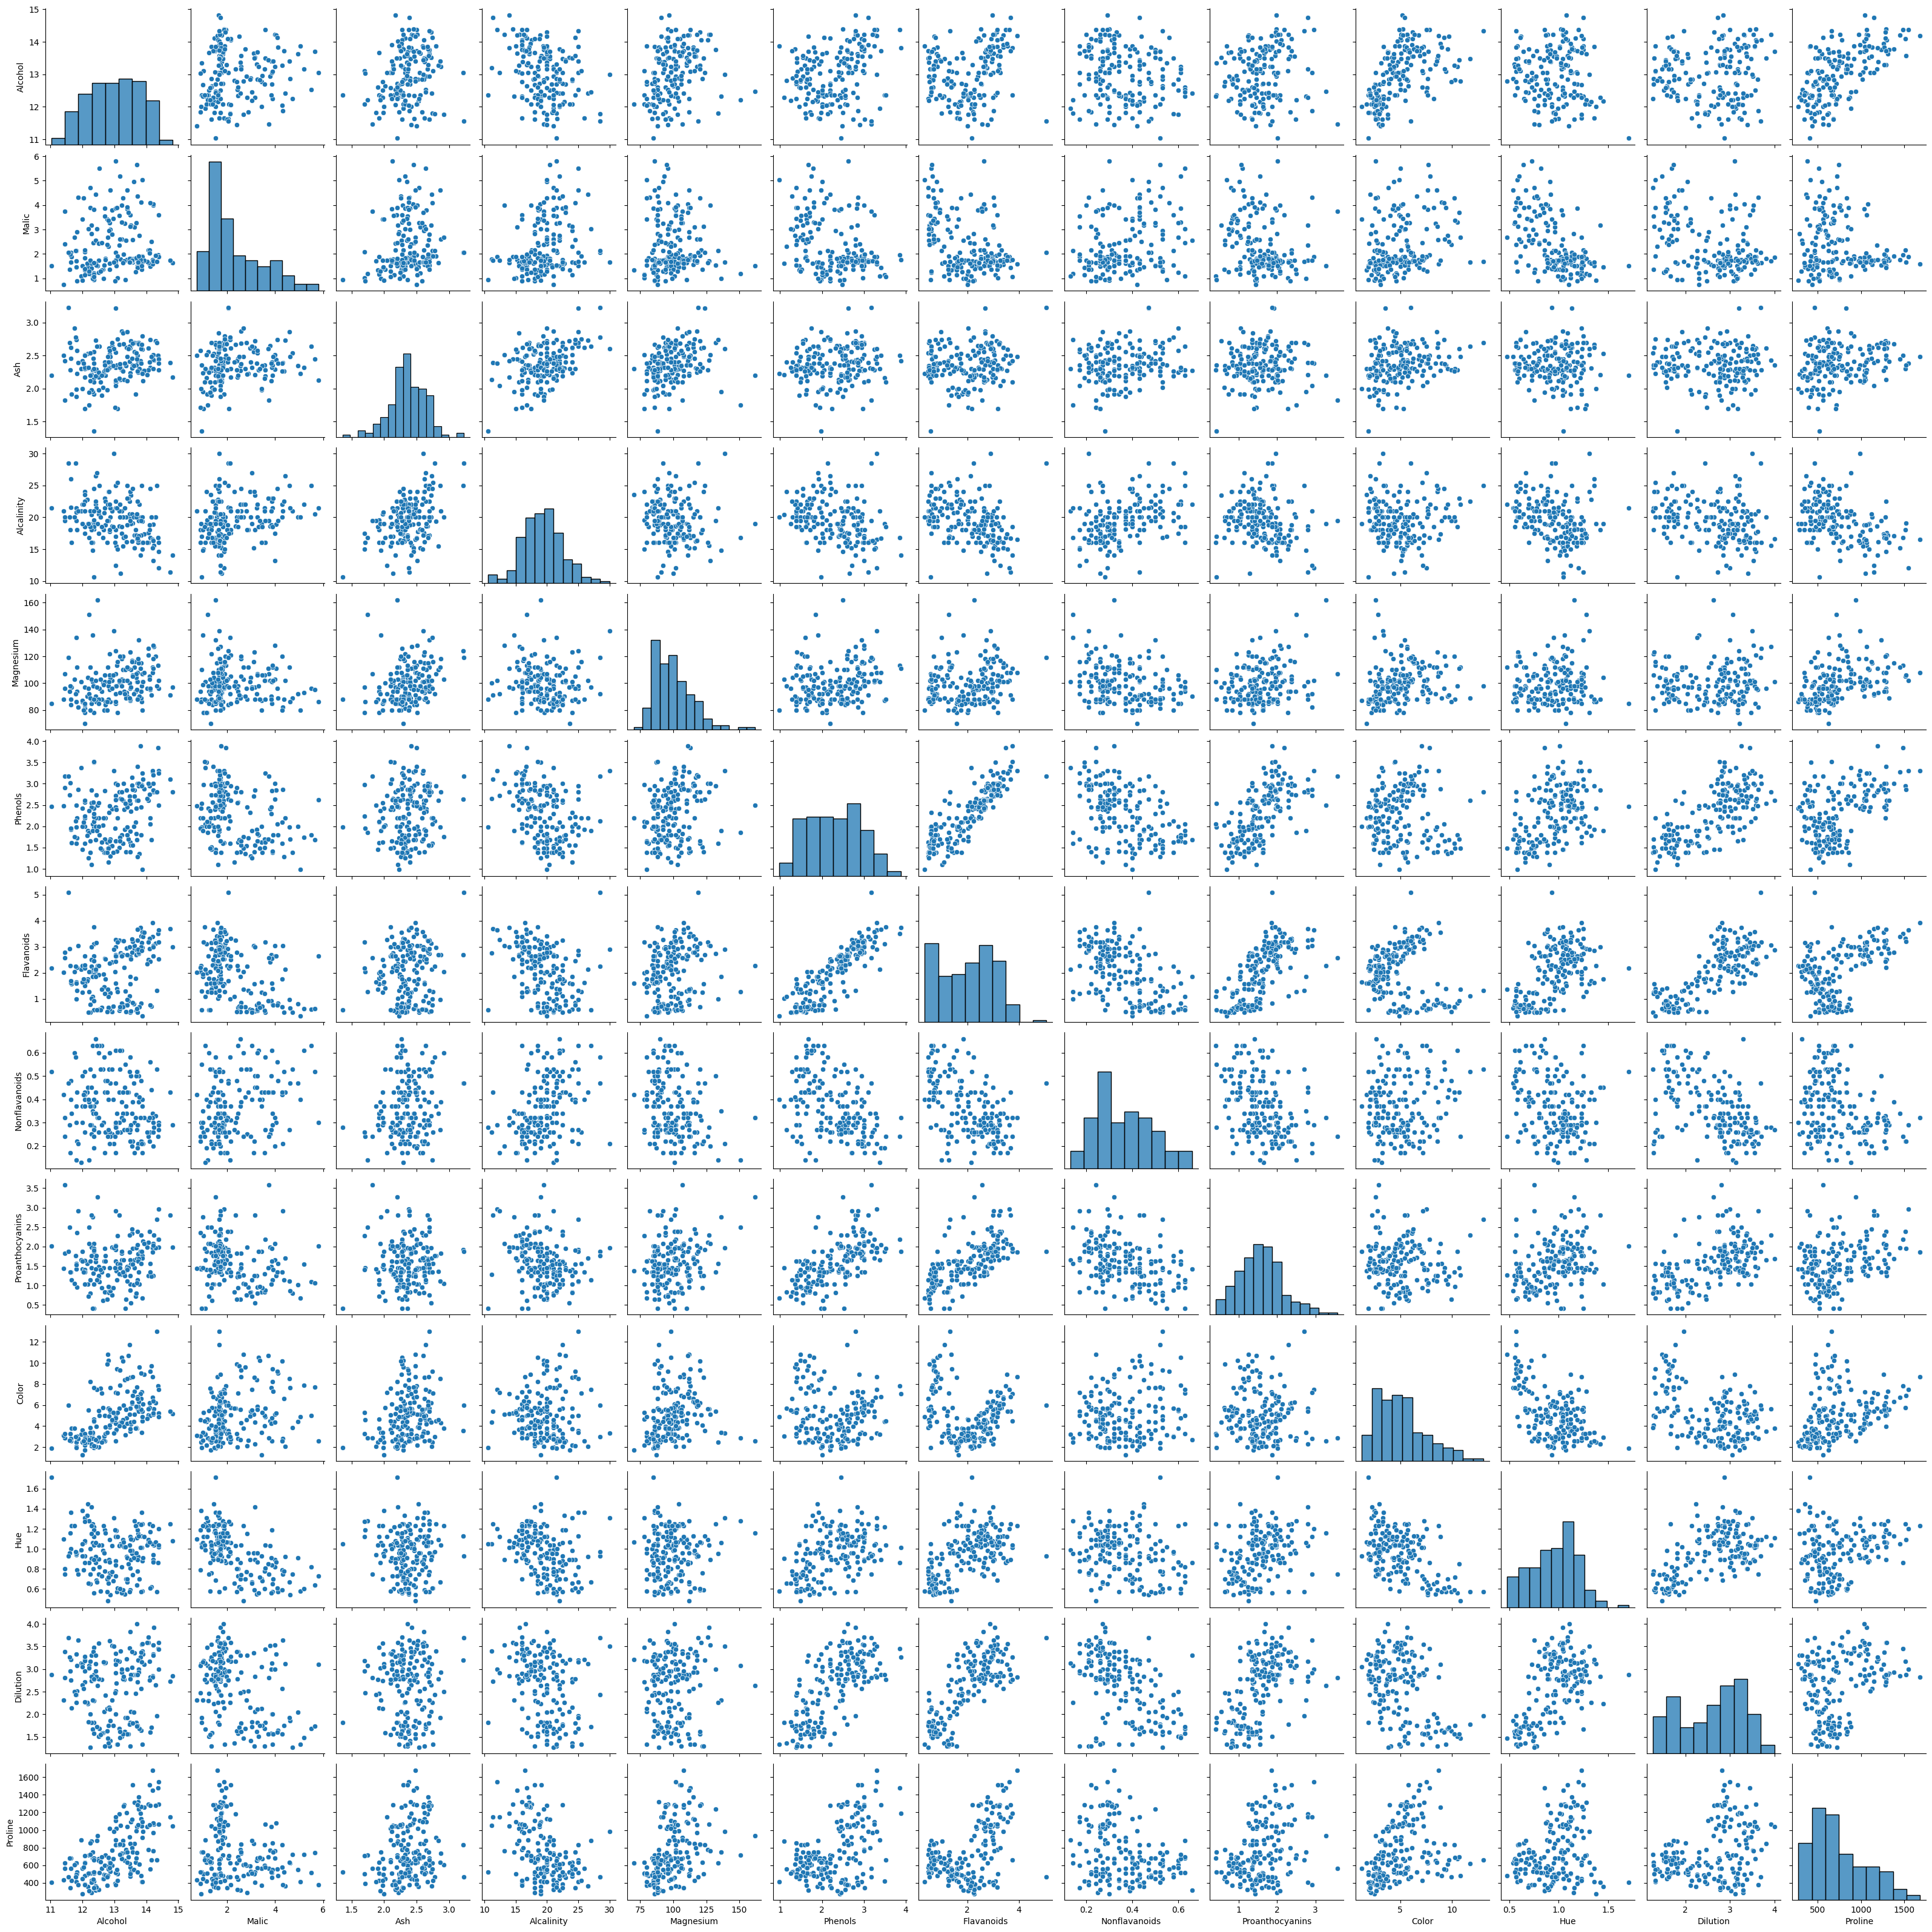

In [ ]:
sns.pairplot(wines_1)

In [ ]:
# we can see correlation in variables here like Alcohol & proline & color .lets see using correlation matrix
wines_1.corr()

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
Alcohol,1.000000,0.094397,0.211545,-0.310235,0.270798,0.289101,0.236815,-0.155929,0.136698,0.546364,-0.071747,0.072343,0.643720
Malic,0.094397,1.000000,0.164045,0.288500,-0.054575,-0.335167,-0.411007,0.292977,-0.220746,0.248985,-0.561296,-0.368710,-0.192011
Ash,0.211545,0.164045,1.000000,0.443367,0.286587,0.128980,0.115077,0.186230,0.009652,0.258887,-0.074667,0.003911,0.223626
Alcalinity,-0.310235,0.288500,0.443367,1.000000,-0.083333,-0.321113,-0.351370,0.361922,-0.197327,0.018732,-0.273955,-0.276769,-0.440597
Magnesium,0.270798,-0.054575,0.286587,-0.083333,1.000000,0.214401,0.195784,-0.256294,0.236441,0.199950,0.055398,0.066004,0.393351
Phenols,0.289101,-0.335167,0.128980,-0.321113,0.214401,1.000000,0.864564,-0.449935,0.612413,-0.055136,0.433681,0.699949,0.498115
Flavanoids,0.236815,-0.411007,0.115077,-0.351370,0.195784,0.864564,1.000000,-0.537900,0.652692,-0.172379,0.543479,0.787194,0.494193
Nonflavanoids,-0.155929,0.292977,0.186230,0.361922,-0.256294,-0.449935,-0.537900,1.000000,-0.365845,0.139057,-0.262640,-0.503270,-0.311385
Proanthocyanins,0.136698,-0.220746,0.009652,-0.197327,0.236441,0.612413,0.652692,-0.365845,1.000000,-0.025250,0.295544,0.519067,0.330417
Color,0.546364,0.248985,0.258887,0.018732,0.199950,-0.055136,-0.172379,0.139057,-0.025250,1.000000,-0.521813,-0.428815,0.316100


In [ ]:
rows ,cols = wines_1.shape
flds = list(wines_1.columns)
corr = wines_1.corr().values
for i in range(cols):
    for j in range(i+1,cols):
        if corr[i,j] > 0.6:# in first iteration it checks in '0'th row & '1'st column element so that repetition is prevented
            print (flds[i], ' ', flds[j], ' ', corr[i,j])

Alcohol   Proline   0.6437200371782134
Phenols   Flavanoids   0.8645635000951147
Phenols   Proanthocyanins   0.6124130837800363
Phenols   Dilution   0.6999493647911861
Flavanoids   Proanthocyanins   0.6526917686075153
Flavanoids   Dilution   0.787193901866951


In [ ]:
# standardising the data because all features will be in every pc so scaling is good & to know how much variance is captured using covarieance
std = StandardScaler()
wine_normal=std.fit_transform(wines_1)
wine_normal

array([[ 1.51861254, -0.5622498 ,  0.23205254, ...,  0.36217728,
         1.84791957,  1.01300893],
       [ 0.24628963, -0.49941338, -0.82799632, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [ 0.19687903,  0.02123125,  1.10933436, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 0.33275817,  1.74474449, -0.38935541, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 0.20923168,  0.22769377,  0.01273209, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.39508604,  1.58316512,  1.36520822, ..., -1.52437837,
        -1.42894777, -0.59516041]])

In [ ]:
wine_normal=pd.DataFrame(wine_normal,columns=wines_1.columns)
wine_normal.head()

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874


In [ ]:
pca=PCA()
pca_components=pca.fit_transform(wine_normal)
pca_components=pd.DataFrame(pca_components,columns=["PC1","PC2","PC3","PC4","PC5","PC6","PC7","PC8","PC9","PC10","PC11","PC12","PC13"])
pca_components.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13
0,3.316751,1.443463,-0.165739,-0.215631,0.693043,0.223880,0.596427,-0.065139,-0.641443,1.020956,-0.451563,0.540810,-0.066239
1,2.209465,-0.333393,-2.026457,-0.291358,-0.257655,0.927120,0.053776,-1.024416,0.308847,0.159701,-0.142657,0.388238,0.003637
2,2.516740,1.031151,0.982819,0.724902,-0.251033,-0.549276,0.424205,0.344216,1.177834,0.113361,-0.286673,0.000584,0.021717
3,3.757066,2.756372,-0.176192,0.567983,-0.311842,-0.114431,-0.383337,-0.643593,-0.052544,0.239413,0.759584,-0.242020,-0.369484
4,1.008908,0.869831,2.026688,-0.409766,0.298458,0.406520,0.444074,-0.416700,-0.326819,-0.078366,-0.525945,-0.216664,-0.079364


In [ ]:
pca_components.corr()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13
PC1,1.000000e+00,1.572092e-16,5.346235e-16,1.523643e-16,-7.221486e-17,1.083993e-16,-3.531991e-16,4.480838e-17,-1.155490e-16,-3.277591e-16,2.196477e-16,-6.242925e-16,3.755835e-16
PC2,1.572092e-16,1.000000e+00,-3.019786e-16,-2.305790e-17,5.127810e-17,1.877400e-16,1.269853e-16,-9.962533e-17,3.407552e-16,-1.477515e-16,-1.412151e-17,4.669513e-16,-2.025598e-16
PC3,5.346235e-16,-3.019786e-16,1.000000e+00,-3.884795e-16,-7.979152e-16,5.299837e-16,-2.879961e-16,-5.873500e-16,-4.622449e-16,-2.800980e-16,-1.808974e-15,-6.038128e-16,1.492186e-16
PC4,1.523643e-16,-2.305790e-17,-3.884795e-16,1.000000e+00,-2.451237e-16,1.462041e-16,3.126501e-16,-4.199174e-16,-7.444835e-16,-8.267697e-16,8.212168e-16,-6.731001e-18,-4.603690e-16
PC5,-7.221486e-17,5.127810e-17,-7.979152e-16,-2.451237e-16,1.000000e+00,5.871205e-16,1.623783e-16,3.031124e-17,9.183671e-16,4.273310e-16,-2.550768e-16,5.802089e-16,-5.187292e-16
PC6,1.083993e-16,1.877400e-16,5.299837e-16,1.462041e-16,5.871205e-16,1.000000e+00,2.407754e-16,4.199310e-16,-4.270059e-16,1.350458e-17,-4.465337e-17,-6.207291e-17,1.107031e-15
PC7,-3.531991e-16,1.269853e-16,-2.879961e-16,3.126501e-16,1.623783e-16,2.407754e-16,1.000000e+00,1.445229e-16,6.096413e-16,1.941818e-16,9.376365e-16,9.512166e-16,-1.404445e-16
PC8,4.480838e-17,-9.962533e-17,-5.873500e-16,-4.199174e-16,3.031124e-17,4.199310e-16,1.445229e-16,1.000000e+00,7.553455e-16,7.813632e-16,-8.157509e-16,-6.606393e-17,-5.278247e-16
PC9,-1.155490e-16,3.407552e-16,-4.622449e-16,-7.444835e-16,9.183671e-16,-4.270059e-16,6.096413e-16,7.553455e-16,1.000000e+00,7.355679e-17,7.387642e-16,1.634131e-15,-6.659076e-16
PC10,-3.277591e-16,-1.477515e-16,-2.800980e-16,-8.267697e-16,4.273310e-16,1.350458e-17,1.941818e-16,7.813632e-16,7.355679e-17,1.000000e+00,-4.010207e-16,-1.125269e-16,1.288670e-15


In [ ]:
pca_components.var()

,0
PC1,4.732437
PC2,2.511081
PC3,1.454242
PC4,0.924166
PC5,0.858049
PC6,0.645282
PC7,0.554141
PC8,0.350466
PC9,0.290512
PC10,0.252320


In [ ]:
a=pca.explained_variance_ratio_*100

In [ ]:
def cumsumi(df):
    j=0
    for i in range(len(df)):
        sum=df[i]+j
        print(sum)
        j=sum

In [ ]:
a[1]

np.float64(19.207490257008942)

In [ ]:
np.cumsum(a)

array([ 36.1988481 ,  55.40633836,  66.52996889,  73.59899908,
        80.16229276,  85.09811607,  89.3367954 ,  92.01754435,
        94.23969775,  96.16971684,  97.90655253,  99.20478511,
       100.        ])

In [ ]:
imp_pc=pd.DataFrame({'PC':["PC1","PC2","PC3","PC4","PC5","PC6","PC7","PC8","PC9","PC10","PC11","PC12","PC13"],
                    'explained variance':pca.explained_variance_ratio_*100,
                    'cumulativesum': np.cumsum(pca.explained_variance_ratio_*100)})

In [ ]:
imp_pc

,PC,explained variance,cumulativesum
0,PC1,36.198848,36.198848
1,PC2,19.207490,55.406338
2,PC3,11.123631,66.529969
3,PC4,7.069030,73.598999
4,PC5,6.563294,80.162293
5,PC6,4.935823,85.098116
6,PC7,4.238679,89.336795
7,PC8,2.680749,92.017544
8,PC9,2.222153,94.239698
9,PC10,1.930019,96.169717


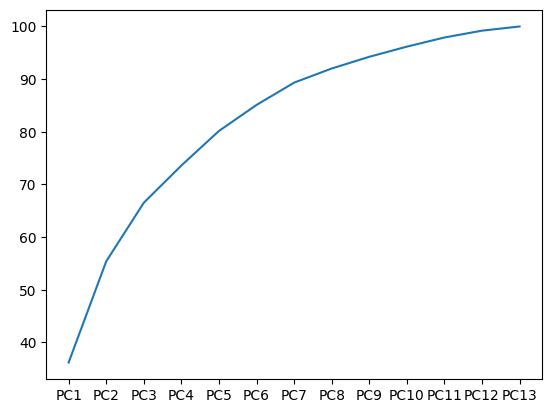

In [ ]:
# scree plot
plt.plot(imp_pc.iloc[:,0],imp_pc.iloc[:,2])

In [ ]:
clu=pca_components.iloc[:,:5]
clu.head()

,PC1,PC2,PC3,PC4,PC5
0,3.316751,1.443463,-0.165739,-0.215631,0.693043
1,2.209465,-0.333393,-2.026457,-0.291358,-0.257655
2,2.516740,1.031151,0.982819,0.724902,-0.251033
3,3.757066,2.756372,-0.176192,0.567983,-0.311842
4,1.008908,0.869831,2.026688,-0.409766,0.298458


In [ ]:
wcss=[]
k=[]
for i in range(1,10) :
    k.append(i)
    k_means = KMeans(init = "k-means++", n_clusters = i)
    k_means.fit(clu)
    wcss.append(k_means.inertia_)

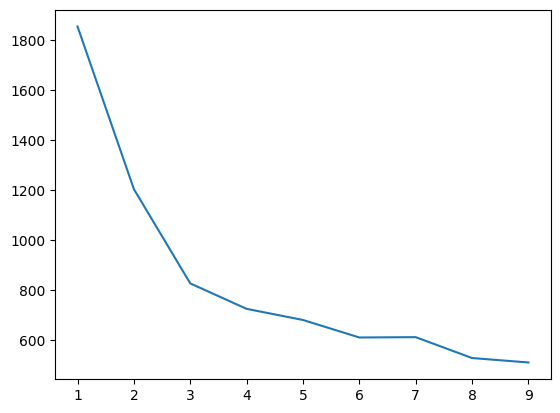

In [ ]:
xpoints = np.array(k)
ypoints = np.array(wcss)

plt.plot(xpoints, ypoints)
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(clu)
labels_3=kmeans.labels_
labels_3

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2], dtype=int32)

In [ ]:
(wines.iloc[:,0]==labels_3).mean()
# labling assigned is different so we cannot compare

np.float64(0.33707865168539325)

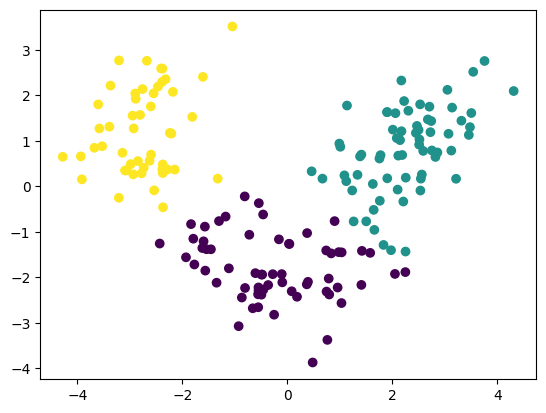

In [ ]:
plt.scatter(pca_components.iloc[:,0],pca_components.iloc[:,1],c=labels_3)

In [ ]:
ss_3=silhouette_score(clu,labels_3)
ss_3
# our clusters are non over lapping clusters

np.float64(0.3666076270932754)

In [ ]:
pca_clu=wines_1
pca_clu['lable']=labels_3

In [ ]:
pca_clu.head()

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,lable
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


In [ ]:
pca_clu.groupby('lable').agg(['mean'])

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
lable,,,,,,,,,,,,,
0,12.241774,1.972097,2.230000,20.012903,91.064516,2.195968,2.000484,0.373226,1.553065,2.984839,1.048806,2.765968,492.887097
1,13.592388,1.936119,2.442985,17.594030,108.298507,2.838060,2.956418,0.286269,1.938806,5.305373,1.071493,3.142836,1069.223881
2,13.151633,3.344490,2.434694,21.438776,99.020408,1.678163,0.797959,0.450816,1.163061,7.343265,0.685918,1.690204,627.551020


In [ ]:
wines_1.drop('lable',axis=1,inplace=True)

In [ ]:
wines_1.head()

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [ ]:
# as KMeans clustering is effected by scale of the feature so lets bring all features to same scale using Standardscaler
wine_normal.head()

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874


In [ ]:
wcss=[]
k=[]
for i in range(1,10) :
    k.append(i)
    k_means = KMeans(init = "k-means++", n_clusters = i)
    k_means.fit(wine_normal)
    wcss.append(k_means.inertia_)

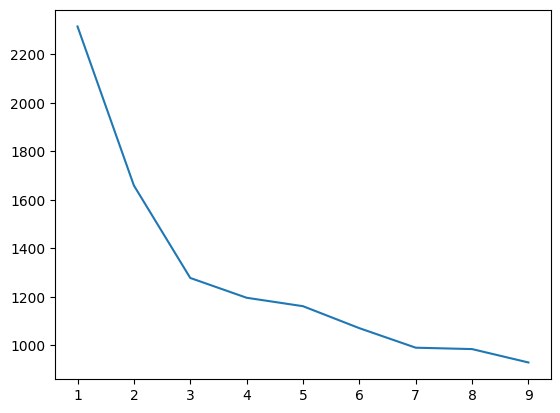

In [ ]:
xpoints = np.array(k)
ypoints = np.array(wcss)

plt.plot(xpoints, ypoints)
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(wine_normal)
labels=kmeans.labels_
labels

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int32)

In [ ]:
ss_3=silhouette_score(wine_normal,labels)
ss_3
# our clusters are non over lapping clusters

np.float64(0.28594199657074876)

In [ ]:
orig_clu=wines_1.copy()

In [ ]:
orig_clu['label']=labels

In [ ]:
orig_clu.head()

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,label
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,2
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,2
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,2
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,2
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,2


In [ ]:
orig_clu.groupby('label').agg(['mean'])

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
label,,,,,,,,,,,,,
0,12.240455,1.899697,2.246364,20.190909,93.136364,2.261818,2.095909,0.359394,1.627879,3.018939,1.060697,2.816818,509.484848
1,13.134118,3.307255,2.417647,21.241176,98.666667,1.683922,0.818824,0.451961,1.145882,7.234706,0.691961,1.696667,619.058824
2,13.711475,1.997049,2.453770,17.281967,107.786885,2.842131,2.969180,0.289180,1.922951,5.444590,1.067705,3.154754,1110.639344


In [ ]:
pca_clu['label'] = kmeans.labels_
cluster_means = pca_clu.groupby('label').agg(['mean'])

print(cluster_means)

         Alcohol     Malic       Ash Alcalinity   Magnesium   Phenols  \
            mean      mean      mean       mean        mean      mean   
label                                                                   
0      12.240455  1.899697  2.246364  20.190909   93.136364  2.261818   
1      13.134118  3.307255  2.417647  21.241176   98.666667  1.683922   
2      13.711475  1.997049  2.453770  17.281967  107.786885  2.842131   

      Flavanoids Nonflavanoids Proanthocyanins     Color       Hue  Dilution  \
            mean          mean            mean      mean      mean      mean   
label                                                                          
0       2.095909      0.359394        1.627879  3.018939  1.060697  2.816818   
1       0.818824      0.451961        1.145882  7.234706  0.691961  1.696667   
2       2.969180      0.289180        1.922951  5.444590  1.067705  3.154754   

           Proline  
              mean  
label               
0       509.48484

In [ ]:
wines.groupby('Type').agg('mean')

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
Type,,,,,,,,,,,,,
1,13.744746,2.010678,2.455593,17.037288,106.338983,2.840169,2.982373,0.290000,1.899322,5.528305,1.062034,3.157797,1115.711864
2,12.278732,1.932676,2.244789,20.238028,94.549296,2.258873,2.080845,0.363662,1.630282,3.086620,1.056282,2.785352,519.507042
3,13.153750,3.333750,2.437083,21.416667,99.312500,1.678750,0.781458,0.447500,1.153542,7.396250,0.682708,1.683542,629.895833
